# **Model Taining**

## **Final Model Prep & Data Pipeline**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

In [2]:
!rm -rf veinsecure-palm-vein-authentication
!git clone https://github.com/anjorisarabhai/veinsecure-palm-vein-authentication.git

Cloning into 'veinsecure-palm-vein-authentication'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 217 (delta 49), reused 20 (delta 20), pack-reused 137 (from 1)
Receiving objects: 100% (217/217), 10.90 MiB | 13.78 MiB/s, done.
Resolving deltas: 100% (81/81), done.


Note: if not able to import from utils.helper try removing the clone directory using:

`!rm -rf veinsecure-palm-vein-authentication`

and then clone again

In [3]:
import sys
sys.path.append('/content/veinsecure-palm-vein-authentication')

In [4]:
!touch /content/veinsecure-palm-vein-authentication/utils/__init__.py

In [5]:
!wget -O /content/veinsecure-palm-vein-authentication/utils/helpers.py https://raw.githubusercontent.com/anjorisarabhai/veinsecure-palm-vein-authentication/main/utils/helpers.py

--2025-06-17 11:16:49--  https://raw.githubusercontent.com/anjorisarabhai/veinsecure-palm-vein-authentication/main/utils/helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4571 (4.5K) [text/plain]
Saving to: ‘/content/veinsecure-palm-vein-authentication/utils/helpers.py’

/content/veinsecure 100%[===================>]   4.46K  --.-KB/s    in 0s      

2025-06-17 11:16:49 (53.5 MB/s) - ‘/content/veinsecure-palm-vein-authentication/utils/helpers.py’ saved [4571/4571]



In [6]:
!ls -R /content/veinsecure-palm-vein-authentication

/content/veinsecure-palm-vein-authentication:
data  model  notebooks	preprocessing  README.md  requirements.txt  utils

/content/veinsecure-palm-vein-authentication/data:
README.md

/content/veinsecure-palm-vein-authentication/model:
train_model.py

/content/veinsecure-palm-vein-authentication/notebooks:
palm_vein_baseline_cnn_model.ipynb  Palm_Vein_Preprocess.ipynb
Palm_Vein_EDA.ipynb		    README.md

/content/veinsecure-palm-vein-authentication/preprocessing:
palm_vein_preprocess.py  README.md

/content/veinsecure-palm-vein-authentication/utils:
helpers.py  __init__.py


In [7]:
import os
print(os.listdir('/content/veinsecure-palm-vein-authentication/utils'))

['__init__.py', 'helpers.py']


In [8]:
!ls /content/veinsecure-palm-vein-authentication/utils
!sed -n '1,20p' /content/veinsecure-palm-vein-authentication/utils/helpers.py

helpers.py  __init__.py
# -*- coding: utf-8 -*-
"""helpers.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1wZh4H_FGlBCgbYLvhelB5mwziKwCSpig
"""

import os

# Create the utils directory if it doesn't exist
os.makedirs('utils', exist_ok=True)

# Full helper code
helper_code = '''
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [9]:
!head -n 127 /content/veinsecure-palm-vein-authentication/utils/helpers.py

# -*- coding: utf-8 -*-
"""helpers.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1wZh4H_FGlBCgbYLvhelB5mwziKwCSpig
"""

import os

# Create the utils directory if it doesn't exist
os.makedirs('utils', exist_ok=True)

# Full helper code
helper_code = '''
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

def load_processed_images(data_dir, img_size=(128, 128)):
    X, y = [], []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
          

In [10]:
import importlib
import utils.helpers
importlib.reload(utils.helpers)

✅ helpers.py updated with loader, generators, pipelines, and batch visualization.


<module 'utils.helpers' from '/content/veinsecure-palm-vein-authentication/utils/helpers.py'>

In [11]:
from utils.helpers import (
    load_processed_images,
    create_data_generators,
    create_tf_data_pipeline
)

### **Modular Model Builder + Final CNN Architecture**

In [12]:
def build_simple_cnn(input_shape, num_classes, dropout_rate=0.3):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(dropout_rate),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(dropout_rate),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

### **Model Config Options**

In [13]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

def get_model(config, input_shape, num_classes):
    arch = config.get("architecture", "simple_cnn")
    dropout = config.get("dropout", 0.3)

    if arch == "simple_cnn":
        return build_simple_cnn(input_shape, num_classes, dropout)

    elif arch == "mobilenet":
        base_model = MobileNetV2(include_top=False, input_shape=input_shape, weights=None)
        model = models.Sequential([
            base_model,
            layers.GlobalAveragePooling2D(),
            layers.Dropout(dropout),
            layers.Dense(num_classes, activation='softmax')
        ])
        return model

    else:
        raise ValueError(f"Unsupported architecture: {arch}")

### **Config Dictionary**

In [14]:
config = {
    "architecture": "simple_cnn",
    "dropout": 0.3,
    "optimizer": "adam",
    "batch_size": 32,
    "learning_rate": 0.001
}

In [15]:
with open('/content/veinsecure-palm-vein-authentication/utils/helpers.py', 'r') as f:
    helpers_content = f.read()

print(helpers_content)


import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

def load_processed_images(data_dir, img_size=(128, 128)):
    X, y = [], []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(class_path, img_file)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        img = cv2.resize(img, img_size)
                        img = img.astype('float32') / 255.0
                        X.append(img)
  

### **Add ImageDataGenerator**





In [16]:
import importlib
import utils.helpers
importlib.reload(utils.helpers)

from utils.helpers import load_processed_images


In [17]:
from utils.helpers import load_processed_images

### **Visualize one batch from new data pipeline**

In [18]:
from google.colab import files
uploaded = files.upload()

Saving processed_dataset.zip to processed_dataset (1).zip


In [19]:
import zipfile
import os

zip_path = "processed_dataset.zip"
extract_path = "processed_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)

Extracted to: processed_dataset


In [20]:
!wget https://github.com/anjorisarabhai/veinsecure-palm-vein-authentication/raw/main/processed_dataset.zip
!unzip processed_dataset.zip

--2025-06-17 11:20:36--  https://github.com/anjorisarabhai/veinsecure-palm-vein-authentication/raw/main/processed_dataset.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-17 11:20:37 ERROR 404: Not Found.

Archive:  processed_dataset.zip
replace processed_dataset/011/011_F_R_3.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: processed_dataset/011/011_F_R_3.JPG  
replace processed_dataset/011/011_F_L_38.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: processed_dataset/011/011_F_L_38.JPG  
replace processed_dataset/011/011_S_R_18.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: processed_dataset/011/011_S_R_18.JPG  
replace processed_dataset/011/011_F_R_6.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: processed_dataset/011/011_F_R_6.JPG  
replace processed_dataset/011/011_F_R_8.JPG? [y]es, [n]o, [A]ll, [N]one, [r]e

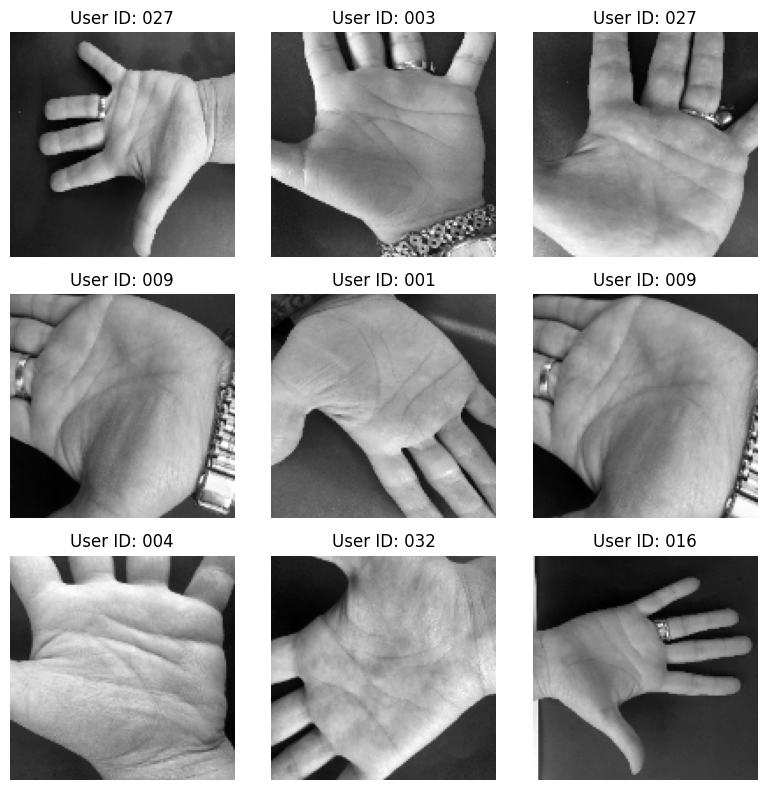

* Batch labels:
Image 1: User ID = 027
Image 2: User ID = 003
Image 3: User ID = 027
Image 4: User ID = 009
Image 5: User ID = 001
Image 6: User ID = 009
Image 7: User ID = 004
Image 8: User ID = 032
Image 9: User ID = 016


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from utils.helpers import load_processed_images, create_tf_data_pipeline
from sklearn.preprocessing import LabelEncoder

# Step 1: Load and encode
X, y, class_names = load_processed_images("processed_dataset")
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 2: Create tf.data pipeline
train_ds, val_ds, test_ds = create_tf_data_pipeline(X, y_encoded, batch_size=16, augment=True)

# Step 3: Get one batch from the train dataset
for batch_X, batch_y in train_ds.take(1):
    batch_X = batch_X.numpy()
    batch_y = batch_y.numpy()

# Step 4: Visualize 9 images with class labels
plt.figure(figsize=(8, 8))
for i in range(9):
    img = batch_X[i].squeeze()
    label_index = np.argmax(batch_y[i])
    label_name = class_names[label_index]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"User ID: {label_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Step 5: Print labels
print("* Batch labels:")
for i in range(9):
    label_index = np.argmax(batch_y[i])
    print(f"Image {i+1}: User ID = {class_names[label_index]}")


## **Training Final Model**


In [22]:
import os
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import CSVLogger
from sklearn.preprocessing import LabelEncoder
from utils.helpers import load_processed_images, create_data_generators
from tensorflow.keras.utils import to_categorical

### **Data Loading and Creation of Data Generators**

In [23]:
# Step 1: Load data
X, y, class_names = load_processed_images("processed_dataset")
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)
num_classes = y_cat.shape[1]

# Step 2: Create data generators
train_gen, val_gen, test_gen = create_data_generators(X, y_encoded, batch_size=32, augment=True)

### **Create results folders**

In [24]:
os.makedirs("results/plots", exist_ok=True)
os.makedirs("results/models", exist_ok=True)
os.makedirs("results/logs", exist_ok=True)

### **Define and Compile Model**

In [25]:
model = models.Sequential([
    layers.Input(shape=(128, 128, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### **Setup logging**

In [26]:
csv_logger = CSVLogger("results/logs/training_log.csv")

### **Track training time and memory usage (basic profiling)**

In [27]:
import time
import tracemalloc

def profile_training(train_func):
    """Wrap your training code inside this function for time & memory profiling."""
    start_time = time.time()
    tracemalloc.start()

    history = train_func()  # your model.fit() or any training function

    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    print(f"🕒 Training time: {(end_time - start_time):.2f} seconds")
    print(f"📈 Peak memory usage: {peak / 1024 / 1024:.2f} MB")

    return history

### **Train model**

In [28]:
history = profile_training(lambda: model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[csv_logger]
))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - accuracy: 0.0190 - loss: 3.8509 - val_accuracy: 0.0331 - val_loss: 3.6877
Epoch 2/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.0335 - loss: 3.6676 - val_accuracy: 0.0992 - val_loss: 3.4485
Epoch 3/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.1096 - loss: 3.3352 - val_accuracy: 0.2686 - val_loss: 2.8663
Epoch 4/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.2536 - loss: 2.9021 - val_accuracy: 0.4008 - val_loss: 2.4418
Epoch 5/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.3198 - loss: 2.5874 - val_accuracy: 0.4793 - val_loss: 2.0357
Epoch 6/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.3967 - loss: 2.2241 - val_accuracy: 0.5165 - val_loss: 1.7258
Epoch 7/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.4348 - loss: 2.0070 - val_accuracy: 0.5950 - val_loss: 1.5103
Epoch 8/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.5443 - loss: 1.6748 - val_accuracy: 0.6240 

### **Plot and Save Learning Curves (results/plots)**

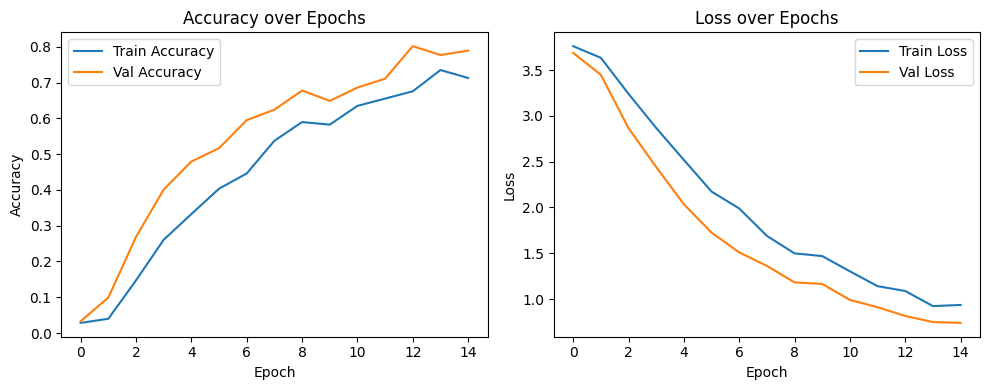

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the training log
log_df = pd.read_csv("results/logs/training_log.csv")

# Plot accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(log_df["accuracy"], label="Train Accuracy")
plt.plot(log_df["val_accuracy"], label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(log_df["loss"], label="Train Loss")
plt.plot(log_df["val_loss"], label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Save plots
plt.tight_layout()
plt.savefig("results/plots/learning_curves.png")
plt.show()

### **Save Final Model (.h5 Format)**

In [30]:
model.save("results/models/final_model.h5")
print("✅ Final model saved to results/models/final_model.h5")

✅ Final model saved to results/models/final_model.h5


### **Log accuracy & loss per epoch**

In [31]:
# Read and display the training log
import pandas as pd

log_df = pd.read_csv("results/logs/training_log.csv")
print("Training Log:")
print(log_df)

Training Log:
    epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.028369  3.760802      0.033058  3.687735
1       1  0.039894  3.633824      0.099174  3.448522
2       2  0.147163  3.240745      0.268595  2.866286
3       3  0.260638  2.868274      0.400826  2.441843
4       4  0.332447  2.519369      0.479339  2.035702
5       5  0.403369  2.173820      0.516529  1.725789
6       6  0.445922  1.989276      0.595041  1.510256
7       7  0.537234  1.690158      0.623967  1.362533
8       8  0.589539  1.499281      0.677686  1.182257
9       9  0.582447  1.469620      0.648760  1.165548
10     10  0.634752  1.303219      0.685950  0.990870
11     11  0.655142  1.141147      0.710744  0.911766
12     12  0.675532  1.088385      0.801653  0.815544
13     13  0.734929  0.923713      0.776860  0.749749
14     14  0.712766  0.936042      0.789256  0.740482


### **Add early stopping & model checkpoint saving**


In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Paths
checkpoint_path = "results/models/best_model.h5"

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)
]

In [33]:
import shutil
shutil.make_archive("results", 'zip', "results")

'/content/results.zip'

In [34]:
from google.colab import files
files.download("results.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>